In [63]:
import pandas as pd
from statsmodels.graphics import tsaplots 
import matplotlib.pyplot as plts
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm

In [50]:
def download(stock):  
    df = yf.download(
         [stock],
         start="2022-01-01",
         end="2024-01-01",
         group_by="ticker",
         progress=False)
            
    df = df.round(4)
    df.insert(loc=0, column='Company', value=stock) 
    return df

In [54]:
df_AAPL = download('AAPL')        
df_AMZN = download('AMZN')      
df_GOOGL = download('GOOGL')      
df_TSLA = download('TSLA')           
df_NVDA = download('NVDA')

In [74]:
print(df_AAPL.describe)
print(df_AMZN.describe)
print(df_TSLA.describe)
print(df_NVDA.describe)
print(df_GOOGL.describe)



<bound method NDFrame.describe of Date
2020-01-02     72.876114
2020-01-03     72.167610
2020-01-06     72.742661
2020-01-07     72.400536
2020-01-08     73.565216
                 ...    
2023-12-22    192.868149
2023-12-26    192.320221
2023-12-27    192.419830
2023-12-28    192.848206
2023-12-29    191.802170
Name: Adj Close, Length: 1006, dtype: float64>
<bound method NDFrame.describe of            Company      Open      High       Low     Close  Adj Close  \
Date                                                                    
2022-01-03    AMZN  167.5500  170.7035  166.1605  170.4045   170.4045   
2022-01-04    AMZN  170.4380  171.4000  166.3495  167.5220   167.5220   
2022-01-05    AMZN  166.8830  167.1265  164.3570  164.3570   164.3570   
2022-01-06    AMZN  163.4505  164.8000  161.9370  163.2540   163.2540   
2022-01-07    AMZN  163.8390  165.2435  162.0310  162.5540   162.5540   
...            ...       ...       ...       ...       ...        ...   
2023-12-22    AMZN  1

In [73]:
print(df_AAPL.info)
print(df_AMZN.info)
print(df_TSLA.info)
print(df_NVDA.info)
print(df_GOOGL.info)

<bound method Series.info of Date
2020-01-02     72.876114
2020-01-03     72.167610
2020-01-06     72.742661
2020-01-07     72.400536
2020-01-08     73.565216
                 ...    
2023-12-22    192.868149
2023-12-26    192.320221
2023-12-27    192.419830
2023-12-28    192.848206
2023-12-29    191.802170
Name: Adj Close, Length: 1006, dtype: float64>
<bound method DataFrame.info of            Company      Open      High       Low     Close  Adj Close  \
Date                                                                    
2022-01-03    AMZN  167.5500  170.7035  166.1605  170.4045   170.4045   
2022-01-04    AMZN  170.4380  171.4000  166.3495  167.5220   167.5220   
2022-01-05    AMZN  166.8830  167.1265  164.3570  164.3570   164.3570   
2022-01-06    AMZN  163.4505  164.8000  161.9370  163.2540   163.2540   
2022-01-07    AMZN  163.8390  165.2435  162.0310  162.5540   162.5540   
...            ...       ...       ...       ...       ...        ...   
2023-12-22    AMZN  153.7700

In [56]:
df_AAPL.head()

,Company,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-01-03,AAPL,177.83,182.88,177.71,182.01,179.2736,104487900
2022-01-04,AAPL,182.63,182.94,179.12,179.70,176.9983,99310400
2022-01-05,AAPL,179.61,180.17,174.64,174.92,172.2902,94537600
2022-01-06,AAPL,172.70,175.30,171.64,172.00,169.4141,96904000
2022-01-07,AAPL,172.89,174.14,171.03,172.17,169.5816,86709100


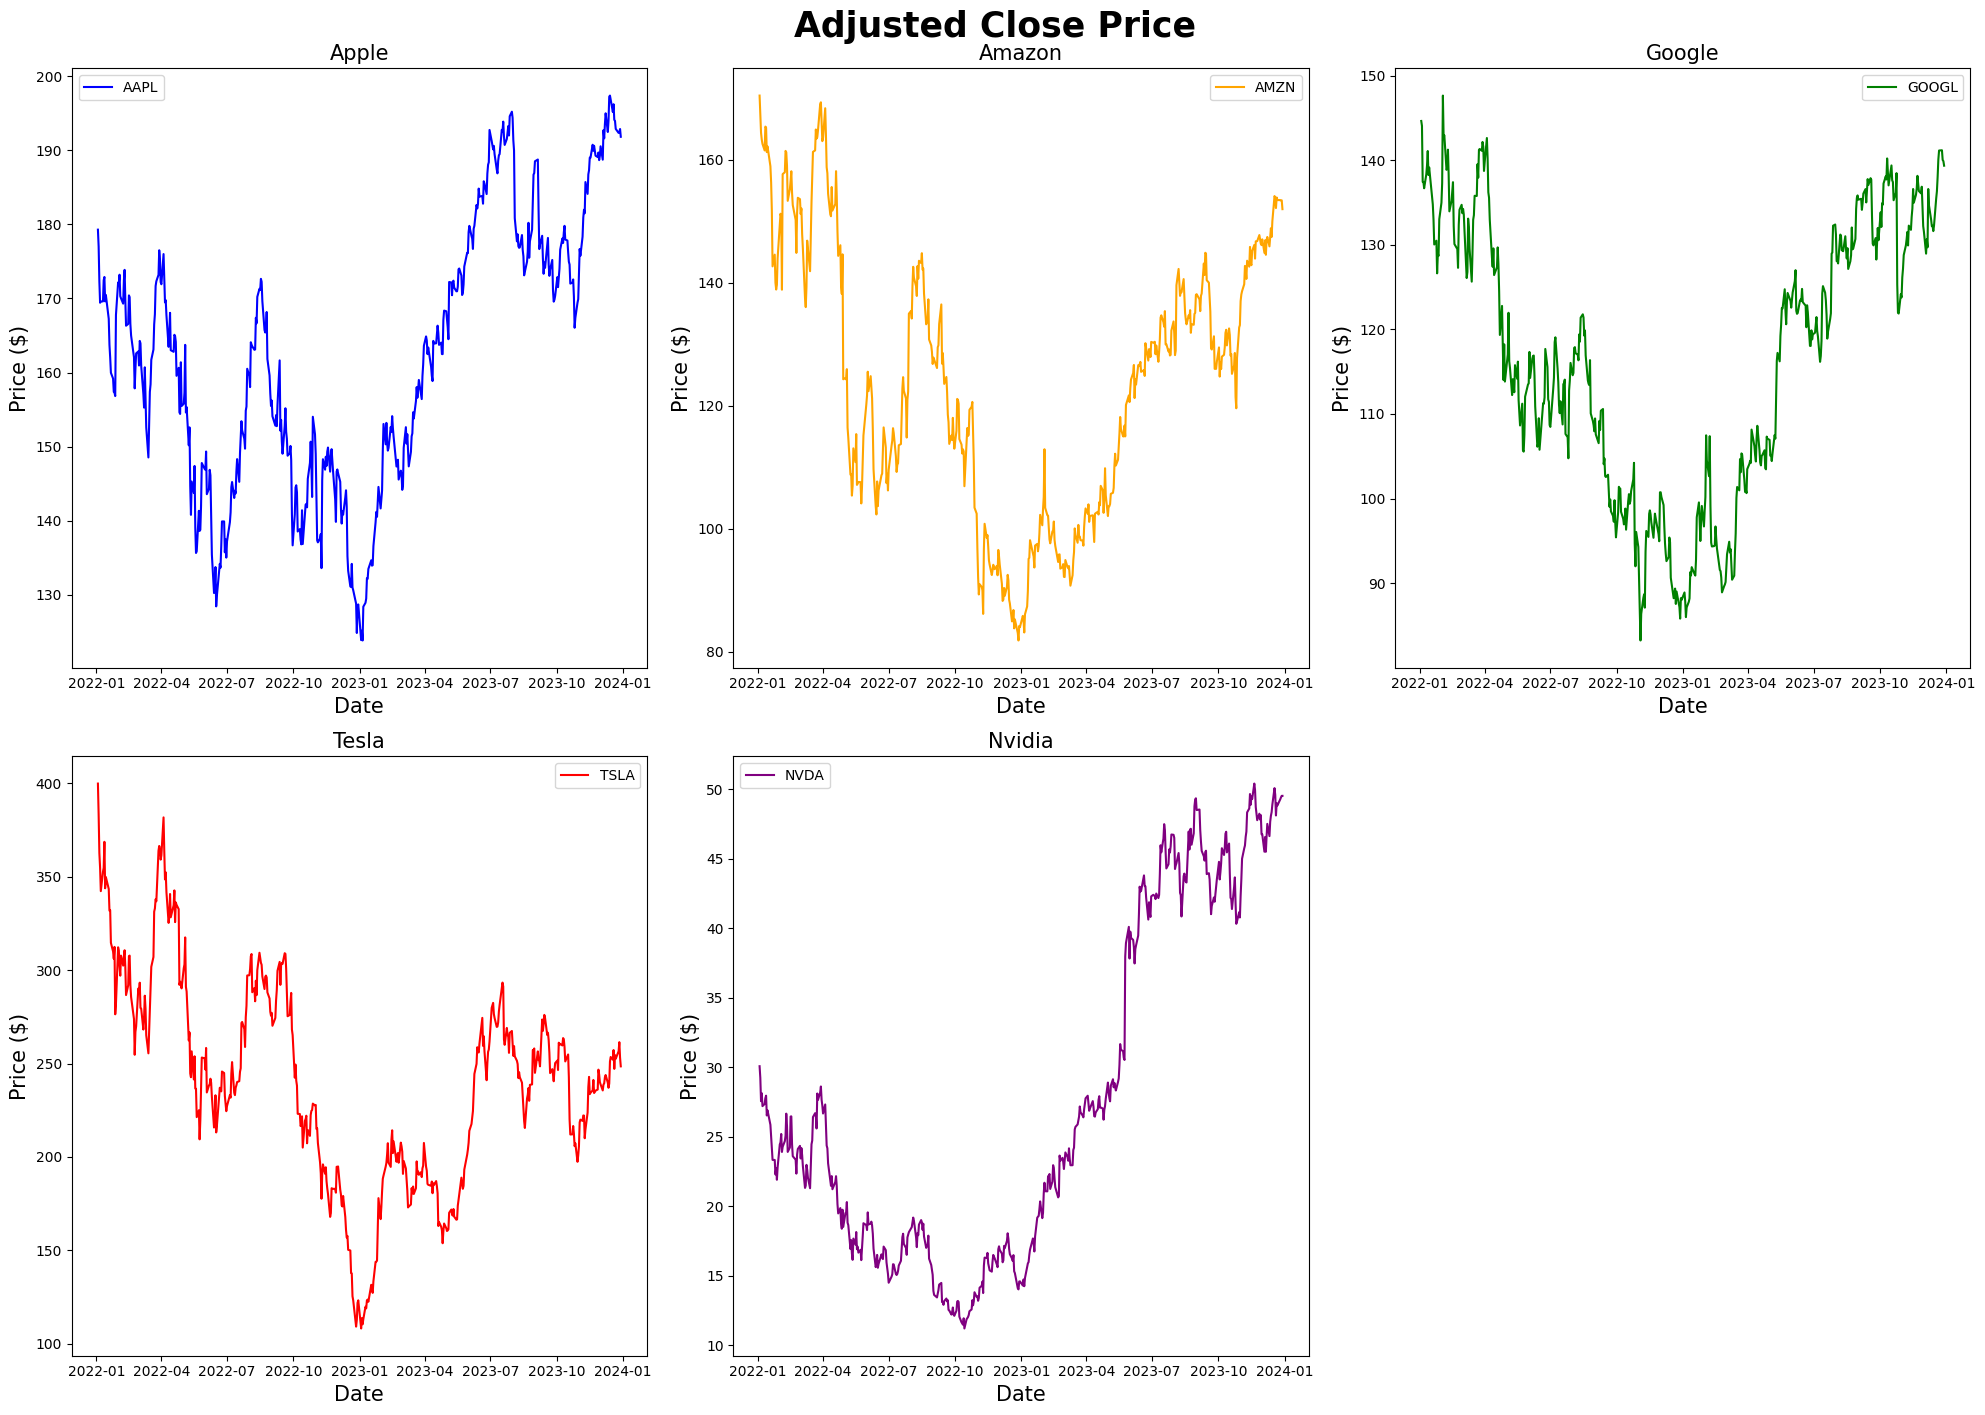

In [58]:

fig, ax = plts.subplots(2, 3, figsize=(20, 15))
fig.delaxes(ax[1, 2])
fontsize = 15

# Apple
ax[0, 0].plot(df_AAPL['Adj Close'], label='AAPL', color='blue')
ax[0, 0].set_title('Apple', fontsize=fontsize)
ax[0, 0].set_xlabel('Date', fontsize=fontsize)
ax[0, 0].set_ylabel('Price ($)', fontsize=fontsize)
ax[0, 0].legend()

# Amazon
ax[0, 1].plot(df_AMZN['Adj Close'], label='AMZN', color='orange')
ax[0, 1].set_title('Amazon', fontsize=fontsize)
ax[0, 1].set_xlabel('Date', fontsize=fontsize)
ax[0, 1].set_ylabel('Price ($)', fontsize=fontsize)
ax[0, 1].legend()

# Google
ax[0, 2].plot(df_GOOGL['Adj Close'], label='GOOGL', color='green')
ax[0, 2].set_title('Google', fontsize=fontsize)
ax[0, 2].set_xlabel('Date', fontsize=fontsize)
ax[0, 2].set_ylabel('Price ($)', fontsize=fontsize)
ax[0, 2].legend()

# TSLA
ax[1, 0].plot(df_TSLA['Adj Close'], label='TSLA', color='red')
ax[1, 0].set_title('Tesla', fontsize=fontsize)
ax[1, 0].set_xlabel('Date', fontsize=fontsize)
ax[1, 0].set_ylabel('Price ($)', fontsize=fontsize)
ax[1, 0].legend()
#NVDA
ax[1, 1].plot(df_NVDA['Adj Close'], label='NVDA', color='purple')
ax[1, 1].set_title('Nvidia', fontsize=fontsize)
ax[1, 1].set_xlabel('Date', fontsize=fontsize)
ax[1, 1].set_ylabel('Price ($)', fontsize=fontsize)
ax[1, 1].legend()

plts.suptitle('Adjusted Close Price', fontsize=25, fontweight='bold', x=0.5, y=0.94)
plts.tight_layout(rect=[0, 0, 1, 0.96]) 
plts.show()


In [60]:
returns_AAPL = df_AAPL['Adj Close'].pct_change()
returns_AMZN = df_AMZN['Adj Close'].pct_change()
returns_GOOGL = df_GOOGL['Adj Close'].pct_change()
returns_TSLA = df_TSLA['Adj Close'].pct_change()
returns_NVDA = df_NVDA['Adj Close'].pct_change()

stats = pd.DataFrame({
    'AAPL': returns_AAPL,
    'AMZN': returns_AMZN,
    'GOOGL': returns_GOOGL,
    'TSLA': returns_TSLA,
    'NVDA': returns_NVDA
}).describe()

print(stats)

             AAPL        AMZN       GOOGL        TSLA        NVDA
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean     0.000302    0.000129    0.000167   -0.000230    0.001621
std      0.018316    0.026819    0.021973    0.037905    0.035657
min     -0.058679   -0.140494   -0.095094   -0.122422   -0.094723
25%     -0.009658   -0.015234   -0.013058   -0.021035   -0.020546
50%      0.000573    0.000147   -0.000092    0.000998    0.002507
75%      0.010124    0.015899    0.012638    0.020642    0.020864
max      0.088975    0.135359    0.076556    0.110002    0.243697


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


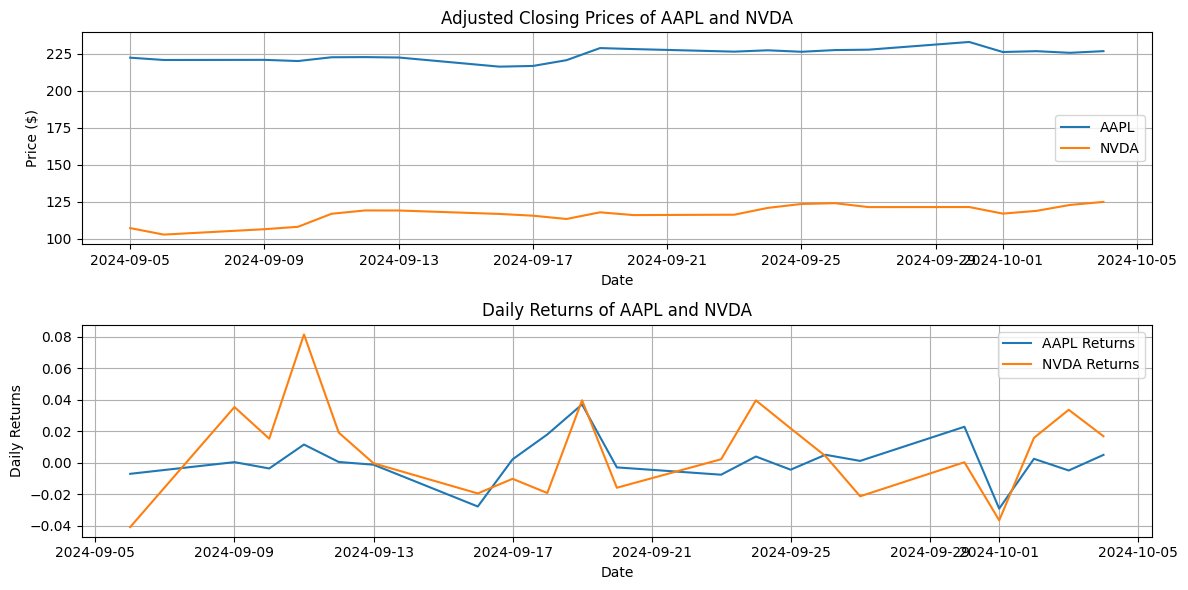

In [78]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

start_date = '2024-09-05'
end_date = '2024-10-05'

df_AAPL = yf.download('AAPL', start=start_date, end=end_date)['Adj Close']
df_NVDA = yf.download('NVDA', start=start_date, end=end_date)['Adj Close']


df_combined = pd.DataFrame({
    'AAPL': df_AAPL,
    'NVDA': df_NVDA
})


returns_combined = df_combined.pct_change().dropna()

# Plot the performance
plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(df_combined, label=['AAPL', 'NVDA'])
plt.title('Adjusted Closing Prices of AAPL and NVDA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(returns_combined, label=['AAPL Returns', 'NVDA Returns'])
plt.title('Daily Returns of AAPL and NVDA')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


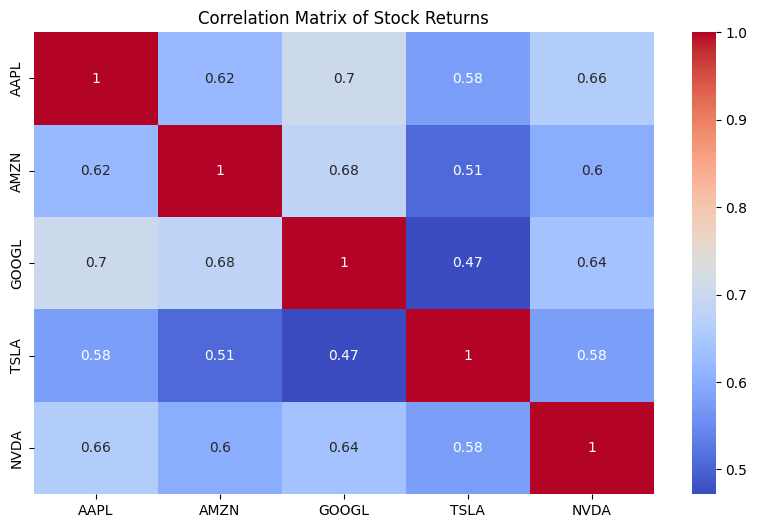

In [62]:
correlation_matrix = pd.DataFrame({
    'AAPL': returns_AAPL,
    'AMZN': returns_AMZN,
    'GOOGL': returns_GOOGL,
    'TSLA': returns_TSLA,
    'NVDA': returns_NVDA
}).corr()

plts.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plts.title('Correlation Matrix of Stock Returns')
plts.show()

[*********************100%***********************]  1 of 1 completed
c:\Users\Leo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Leo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Leo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


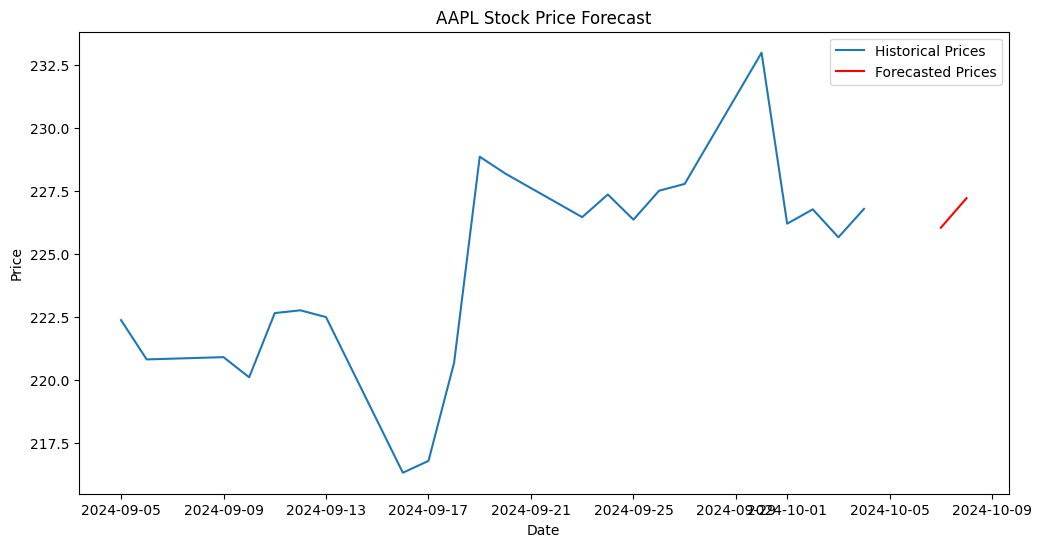

In [81]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = yf.download('AAPL', start='2024-09-05', end='2024-10-06')

df = df['Adj Close'].dropna()


model = sm.tsa.ARIMA(df, order=(5, 1, 0))  
model_fit = model.fit()

forecast = model_fit.forecast(steps=2) 


plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical Prices')
plt.plot(forecast, label='Forecasted Prices', color='red')
plt.title('AAPL Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
